### 고객 분석

**EDA 보기 전**  
기초부터...

0-1. `.csv` 파일 읽기

In [1]:
import pandas as pd

# Warning 방지
data_type = {
    "고객번호": str
}

members = pd.read_csv('../data/members.csv', dtype=data_type)
members.head()

,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
0,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes
1,201812310749770,여,기혼,제주,33.0,국민은행,검색광고,Yes
2,201812310749771,여,기혼,부산,32.0,하나은행,네이버블로그,Yes
3,201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No
4,201812310749780,여,기혼,서울,32.0,신한은행,직접검색,Yes


In [2]:
members.dtypes

고객번호       object
성별         object
결혼유무       object
거주지역       object
연령        float64
결제등록카드     object
유입경로       object
자녀여부       object
dtype: object

0-2. 연령별 히스토그램

In [3]:
members = members.dropna()
ages = members["연령"]
ages

0        37.0
1        33.0
2        32.0
3        34.0
4        32.0
         ... 
81089    31.0
81090    37.0
81091    26.0
81092    32.0
81093    35.0
Name: 연령, Length: 81094, dtype: float64

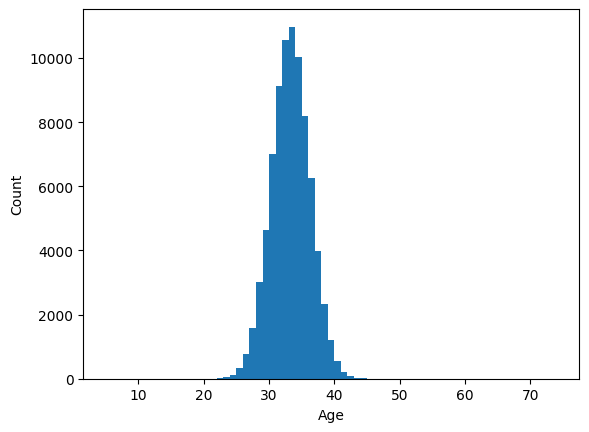

In [4]:
from matplotlib import pyplot as plt

plt.hist(ages, bins=range(5, 75, 1))
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

0-2-a. 30대가 많은데 몇 퍼센트나 될까? 

In [5]:
# 30 ~ 39세
ages.loc[(30 <= ages) & (ages <= 39)].size / ages.size * 100

85.93854045922016

0-2. 연령과 구매력 분포도

In [6]:
import pandas as pd

# Warning 방지
data_type = {
    "주문번호": str,
    "고객번호": str
}

sales = pd.read_csv('../data/sales.csv', dtype=data_type)
sales.head()

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입)
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형)
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)


In [7]:
# 고객번호별 구매금액
user_overall_costs = sales.groupby("고객번호")["구매금액"].sum()
user_overall_costs

고객번호
201812310749735          77000
201812310749770           5610
201812310749771          59520
201812310749774         151920
201812310749780          27920
                         ...  
20200724113017315991     11700
20200729134409126553      3000
20200803075905757887      5900
20200805170229147688      3000
20200805223526494551      8500
Name: 구매금액, Length: 81360, dtype: int64

In [8]:
# 고객 테이블과 병합
joined = pd.merge(left=user_overall_costs, right=members.dropna(), how='inner', on="고객번호")
joined

,고객번호,구매금액,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
0,201812310749735,77000,여,기혼,인천,37.0,국민은행,인스타그램,Yes
1,201812310749770,5610,여,기혼,제주,33.0,국민은행,검색광고,Yes
2,201812310749771,59520,여,기혼,부산,32.0,하나은행,네이버블로그,Yes
3,201812310749774,151920,여,미혼,경남,34.0,기업은행,지인추천,No
4,201812310749780,27920,여,기혼,서울,32.0,신한은행,직접검색,Yes
...,...,...,...,...,...,...,...,...,...
81089,201912291058164,48900,여,기혼,경기,31.0,국민은행,오픈마켓,Yes
81090,201912291058167,124200,여,기혼,경남,37.0,롯데카드,오픈마켓,Yes
81091,201912291058168,211940,여,기혼,충북,26.0,삼성카드,검색광고,Yes
81092,201912291058169,51000,여,기혼,경기,32.0,새마을금고,인스타그램,Yes


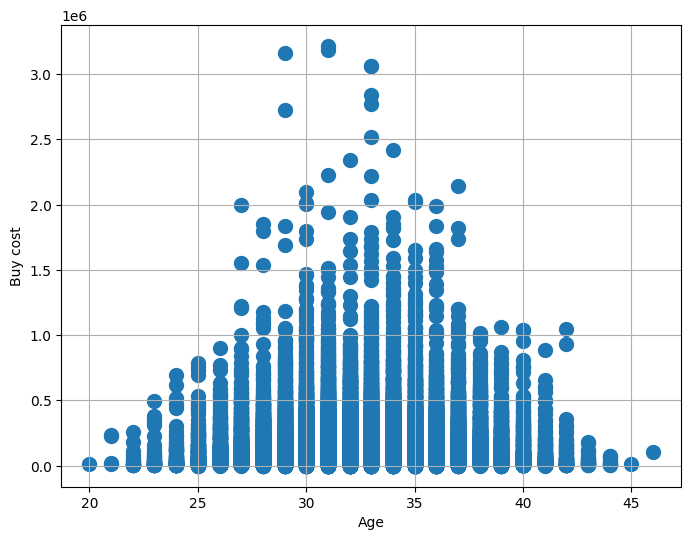

In [9]:
# 2차원 히트맵 생성
plt.figure(figsize=(8, 6))
plt.scatter(joined["연령"], joined["구매금액"], s=100)
plt.xlabel('Age')
plt.ylabel('Buy cost')
plt.grid(True)
plt.show()

이것으로는 관계를 찾기 힘들 것 같다..

0-3. 단순 분석

In [10]:
# 카테고리 바꿔 가면서 체크
members.groupby("성별").count()

,고객번호,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
성별,,,,,,,
남,2496,2496,2496,2496,2496,2496,2496
여,78598,78598,78598,78598,78598,78598,78598


In [11]:
# 2중 카테고리
members.groupby(["성별", "결혼유무"]).count()

고객번호   거주지역     연령  결제등록카드   유입경로   자녀여부
성별 결혼유무                                           
남  기혼     2099   2099   2099    2099   2099   2099
   미혼      397    397    397     397    397    397
여  기혼    66430  66430  66430   66430  66430  66430
   미혼    12168  12168  12168   12168  12168  12168

In [12]:
# 기혼자 중 자녀여부 비율 확인
married_baby = members[(members["결혼유무"] == "기혼") & (members["자녀여부"] == "Yes")]
married = members[members["결혼유무"] == "기혼"]

married_baby.size / married.size * 100

95.3537918253586

In [13]:
nonmarried_baby = members[(members["결혼유무"] == "미혼") & (members["자녀여부"] == "Yes")]
nonmarried_baby.size

0

In [14]:
# 특정 상품을 구매한 고객
haggis = sales[sales["상품명"].str.contains("하기스")]
haggis.size / sales.size * 100

44.41872209361047

In [15]:
# 그 중 자녀를 가진 고객이 구매한 비율
baby_bought = haggis[haggis["고객번호"].isin(married_baby["고객번호"])]
baby_bought.size / haggis.size * 100

80.33702173643864

**이후 EDA를 보고 오긴 했음...**

In [16]:
members["연령"].describe()

count    81094.000000
mean        32.803228
std          2.948941
min         20.000000
25%         31.000000
50%         33.000000
75%         35.000000
max         46.000000
Name: 연령, dtype: float64

1-1. 기혼 여부와 남성 비율

In [17]:
pd.crosstab(index = members['성별'], columns = members['결혼유무'])

결혼유무,기혼,미혼
성별,,
남,2099,397
여,66430,12168


In [18]:
import scipy.stats

"""
변수의 독립 여부 확인
귀무가설: 잠정적으로 옳은 가설, 기존의 가설. 보통 보수적으로 채택
  - 독립성 테스트의 경우, "변수 간 독립성이 없다"가 귀무가설
대립가설: 증명하고자 하는 가설. 귀무가설과 반대, 
  - 독립성 테스트의 경우, "변수 간 독립성이 있다"가 대립가설
  
p는 P-value인데 이것이 0.05보다 작으면 보통 귀무가설을 채택하여 독립이 아니라고 판단한다.
"""
def click_abtest(a_selected, total_a, b_selected, total_b):
    selected = [a_selected, b_selected]
    no_selected = [total_a-a_selected, total_b-b_selected]
    chi2, p, dof, expected = scipy.stats.chi2_contingency([selected, no_selected])
    return p

print(click_abtest(2099, 2099+66430, 397, 397+12168))

0.5834013590051241


0.05보다 훨씬 큰 값으로 관련이 없다.

1-2. 기혼과 특정 상품 구매 여부

In [19]:
def get_unique_user_count(df: pd.DataFrame) -> int:
    return df.size

haggis = sales[sales["상품명"].str.contains("하기스")]
married_sales = sales[sales["고객번호"].isin(married_baby["고객번호"])]
married_sales_haggis = married_sales[married_sales["상품명"].str.contains("하기스")]

arr = [married_sales_haggis, married_sales, haggis, sales]
counts = list(map(get_unique_user_count, arr))
print(counts)
print(click_abtest(*counts))

[713690, 1608330, 888370, 1999990]
0.40237393277336175


구매 내역 수로 해서 관련이 없는 걸까? 유저 수로 해 보자

In [20]:
haggis["주문번호"].unique()

array(['202002203424450', '201905132367003', '201905092356247', ...,
       '20200708231905-73449246312', '20200724103827-77507569402',
       '20200803080150-09054399128'], dtype=object)

In [21]:
def get_unique_user_count(df: pd.DataFrame) -> int:
    return df["주문번호"].unique().size

uniques = list(map(lambda x: get_unique_user_count(x), arr))
print(uniques)
print(click_abtest(*uniques))

[68046, 146660, 84692, 182426]
0.874273171650051


역시 관련이 없다..

1-3. 체험팩?

In [22]:
sales.groupby("물품대분류").count()

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,상품명
물품대분류,,,,,,,,,
FC,12436,12436,12436,12436,8380,12436,12436,12436,12436
FMC,25976,25976,25976,25976,16416,25976,25976,25976,25976
SKC,9379,9379,9379,9379,7367,9379,9379,9379,9379
SrC,14,14,14,14,11,14,14,14,14
기저귀,35404,35404,35404,35404,31609,35404,35404,35404,35404
기타,7893,7893,7893,7893,6761,7893,7893,7893,7893
더블하트,37294,37294,37294,37294,34102,37294,37294,37294,37294
물티슈,8455,8455,8455,8455,6134,8455,8455,8455,8455
체험팩,35488,35488,35488,35488,32306,35488,35488,35488,35488


체험팩이 생각보다 비중이 높은데?

In [23]:
experiments = sales[sales["물품대분류"] == "체험팩"]
experiments

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
6,201901301958105,2019-01-30,2019-01-31,2019-02-02,2.0,201812310749780,27920,19900,체험팩,[하기스 샘플러_3단계 여아] + 매직핏팬티 체험팩
15,201904292316940,2019-04-29,2019-04-30,2019-05-04,3.0,201812310749784,6040,4851,체험팩,하기스 에어솔솔 썸머기저귀 3단계 공용 20매(밴드형/체험팩)
20,202004013610768,2020-04-02,2020-04-03,2020-04-05,14.0,201812310749784,5900,5841,체험팩,NEW 하기스 네이처메이드 팬티 3단계 여아 20매(팬티형/체험팩)
29,201904082250003,2019-04-08,2019-04-09,2019-04-11,3.0,201812310749787,6040,3861,체험팩,하기스 맥스드라이 3단계 공용 20매(밴드형/체험팩)
64,201904292317276,2019-04-29,2019-04-30,2019-05-02,4.0,201812310749827,7280,5841,체험팩,하기스 맥스드라이 팬티 4단계 여아 20매(팬티형/체험팩)
...,...,...,...,...,...,...,...,...,...,...
199989,20200705214443-43993064123,2020-07-06,2020-07-07,2020-07-09,NaN,20200705213917994947,3000,3000,체험팩,맘큐 허그박스
199992,20200722143921-14976246779,2020-07-22,2020-07-23,2020-07-25,NaN,20200722141538955000,3000,3000,체험팩,맘큐 허그박스
199995,20200729134816-18220910068,2020-07-29,2020-07-30,2020-08-01,NaN,20200729134409126553,3000,3000,체험팩,맘큐 허그박스
199996,20200803080150-09054399128,2020-08-03,2020-08-04,2020-08-07,5.0,20200803075905757887,5900,5841,체험팩,NEW 하기스 맥스드라이 팬티 3단계 공용 20매(팬티형/체험팩) (EA)


c:\Users\LHU\DEV_WIN\da-study\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\LHU\DEV_WIN\da-study\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\LHU\DEV_WIN\da-study\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\LHU\DEV_WIN\da-study\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


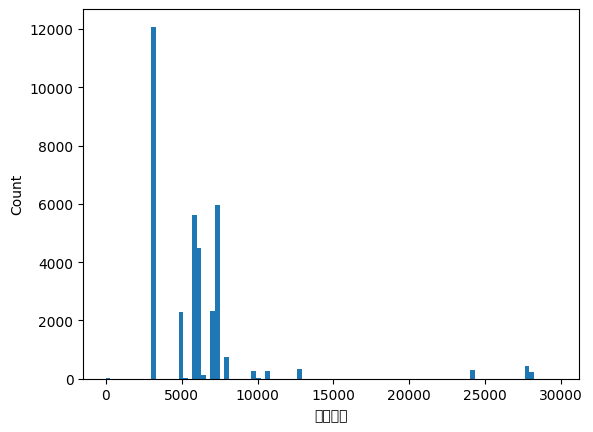

In [24]:
plt.hist(experiments["구매금액"], bins=range(0, 30000, 300))
plt.xlabel('구매금액')
plt.ylabel('Count')
plt.show()

In [25]:
# Join
joined2 = pd.merge(left=experiments, right=members.dropna(), how='inner', on="고객번호")
joined2

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
0,201901301958105,2019-01-30,2019-01-31,2019-02-02,2.0,201812310749780,27920,19900,체험팩,[하기스 샘플러_3단계 여아] + 매직핏팬티 체험팩,여,기혼,서울,32.0,신한은행,직접검색,Yes
1,201904292316940,2019-04-29,2019-04-30,2019-05-04,3.0,201812310749784,6040,4851,체험팩,하기스 에어솔솔 썸머기저귀 3단계 공용 20매(밴드형/체험팩),여,기혼,충북,33.0,국민은행,네이버블로그,Yes
2,202004013610768,2020-04-02,2020-04-03,2020-04-05,14.0,201812310749784,5900,5841,체험팩,NEW 하기스 네이처메이드 팬티 3단계 여아 20매(팬티형/체험팩),여,기혼,충북,33.0,국민은행,네이버블로그,Yes
3,201904082250003,2019-04-08,2019-04-09,2019-04-11,3.0,201812310749787,6040,3861,체험팩,하기스 맥스드라이 3단계 공용 20매(밴드형/체험팩),여,기혼,광주,35.0,BC카드,네이버블로그,Yes
4,201904292317276,2019-04-29,2019-04-30,2019-05-02,4.0,201812310749827,7280,5841,체험팩,하기스 맥스드라이 팬티 4단계 여아 20매(팬티형/체험팩),여,기혼,경북,31.0,농협회원조합,인스타그램,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35385,202001133294307,2020-01-14,2020-01-15,2020-01-17,3.0,201912291058144,5900,5841,체험팩,2020 하기스 매직팬티 컴포트 3단계 남아 20매(팬티형/체험팩),여,기혼,경남,35.0,새마을금고,인스타그램,Yes
35386,201912293245997,2019-12-29,2019-12-30,2020-01-02,-1.0,201912291058148,3000,3000,체험팩,맘큐 허그박스,여,기혼,충남,31.0,신한카드,네이버카페,Yes
35387,201912303250195,2019-12-31,2020-01-01,2020-01-03,0.0,201912291058151,3000,3000,체험팩,맘큐 허그박스,여,기혼,충북,34.0,롯데카드,네이버카페,Yes
35388,202002033367542,2020-02-04,2020-02-05,2020-02-07,8.0,201912291058168,5900,5841,체험팩,NEW 하기스 맥스드라이 팬티 3단계 공용 20매(팬티형/체험팩),여,기혼,충북,26.0,삼성카드,검색광고,Yes


In [26]:
# 특정 연령층이 체험팩을 많이 샀을까?
joined2["연령"].describe()

count    35390.000000
mean        32.813846
std          2.936303
min         21.000000
25%         31.000000
50%         33.000000
75%         35.000000
max         44.000000
Name: 연령, dtype: float64

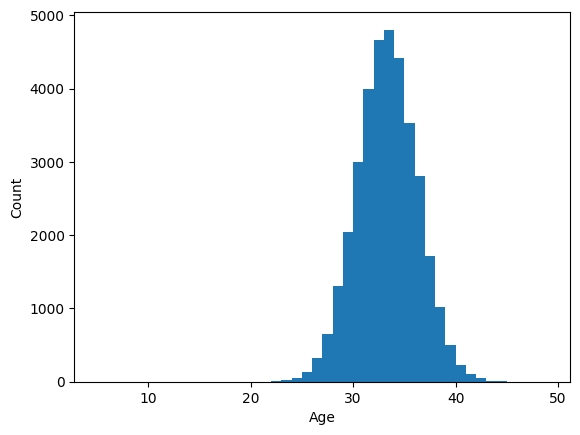

In [27]:
plt.hist(joined2["연령"], bins=range(5, 50, 1))
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

연령은 아닌 것 같다..

In [28]:
# 카테고리 변경해 가며 찾기
joined2.groupby("유입경로").count()

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,성별,결혼유무,거주지역,연령,결제등록카드,자녀여부
유입경로,,,,,,,,,,,,,,,,
검색광고,3675,3675,3675,3675,3305,3675,3675,3675,3675,3675,3675,3675,3675,3675,3675,3675
네이버블로그,9889,9889,9889,9889,9035,9889,9889,9889,9889,9889,9889,9889,9889,9889,9889,9889
네이버카페,2501,2501,2501,2501,2269,2501,2501,2501,2501,2501,2501,2501,2501,2501,2501,2501
매장쿠폰,194,194,194,194,170,194,194,194,194,194,194,194,194,194,194,194
오픈마켓,891,891,891,891,814,891,891,891,891,891,891,891,891,891,891,891
이마트,77,77,77,77,70,77,77,77,77,77,77,77,77,77,77,77
인스타그램,13605,13605,13605,13605,12407,13605,13605,13605,13605,13605,13605,13605,13605,13605,13605,13605
지인추천,3407,3407,3407,3407,3122,3407,3407,3407,3407,3407,3407,3407,3407,3407,3407,3407
직접검색,522,522,522,522,478,522,522,522,522,522,522,522,522,522,522,522


## Other...

In [29]:
non_haggis = sales[~ sales["상품명"].str.contains("하기스")]
non_haggis

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입)
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤
7,201901161908099,2019-01-17,2019-01-18,2019-01-20,NaN,201812310749783,6770,6029,FC,디펜드 맘스 안심패드 30개입
8,201906302542644,2019-06-30,2019-07-01,2019-07-03,NaN,201812310749783,52100,37110,더블하트,더블하트 SofTouch 모유실감 노꼭지트윈팩 240ml(오렌지) + SofTouc...
9,201906302542644,2019-06-30,2019-07-01,2019-07-03,NaN,201812310749783,12000,9504,더블하트,더블하트 유아용 입술치발기
...,...,...,...,...,...,...,...,...,...,...
199992,20200722143921-14976246779,2020-07-22,2020-07-23,2020-07-25,NaN,20200722141538955000,3000,3000,체험팩,맘큐 허그박스
199994,20200724113704-52679491210,2020-07-24,2020-07-25,2020-07-27,5.0,20200724113017315991,11700,9240,FMC,크리넥스 뽑아쓰는 키친타월 펭수에디션 140매 X 4입 (EA)
199995,20200729134816-18220910068,2020-07-29,2020-07-30,2020-08-01,NaN,20200729134409126553,3000,3000,체험팩,맘큐 허그박스
199997,20200805171023-18783441109,2020-08-06,2020-08-07,2020-08-11,NaN,20200805170229147688,3000,3000,체험팩,맘큐 허그박스


**문제 인지**
- 분석 방법이 숙련되지 않아서인가?
  - 2개 항목이 아닌 3개 이상을 엮어야 하는가?
  - 그렇다면 데이터 프로세싱을 어떻게 해야 하는가?
- 일단 이런 과정이 EDA인 것 자체는 맞는 것 같은데...
- NaN, ??? 등의 비유효 데이터를 Clansing하지 않아서 그런가?
  - 기준은? DA의 마음대로?